# Predicting Medical Insurance Costs
**Author:** Kate Huntsman 
**Date:** April 8, 2025  

## Introduction

This project aims to predict individual medical insurance charges using demographic and health-related data. The dataset contains information such as age, BMI, number of children, smoking status, and region. By applying linear regression models and pipelines, we seek to understand which factors most influence insurance costs and how well we can predict them.

We will follow a structured machine learning workflow including data inspection, preprocessing, modeling, and evaluation.

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Section 1. Import and Inspect the Data
## 1.1 Load the dataset and display the first 10 rows.

In [17]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 1.2 Check for missing values and display summary statistics.

In [18]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Reflection 1: What do you notice about the dataset? Are there any data issues?
The dataset contains 1338 entries with no missing values—great start.

All numerical and categorical variables seem logically formatted.

Key features like smoker, bmi, and age show substantial variation, which should help with prediction.

No obvious data issues were detected, although further EDA was useful to confirm distributions and outliers.

### Section 2. Data Exploration and Preparation
## 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

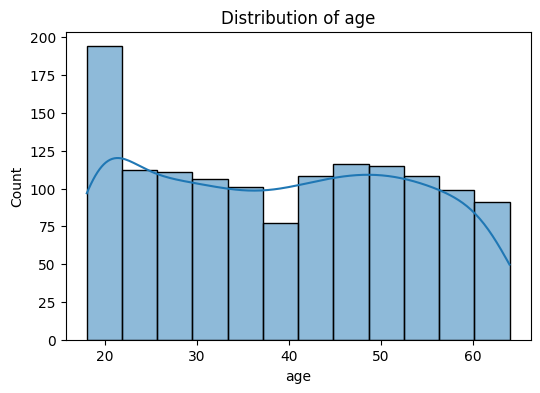

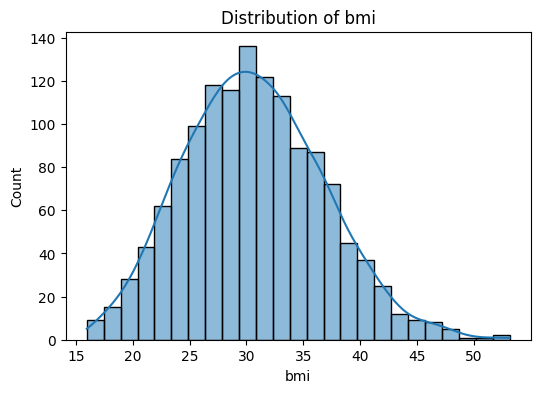

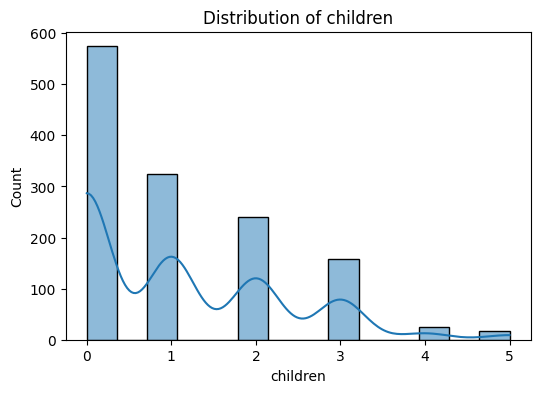

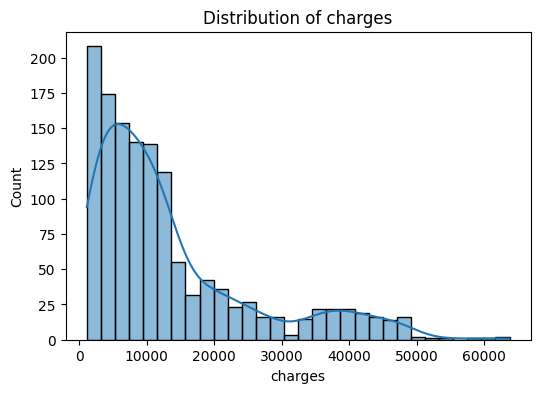

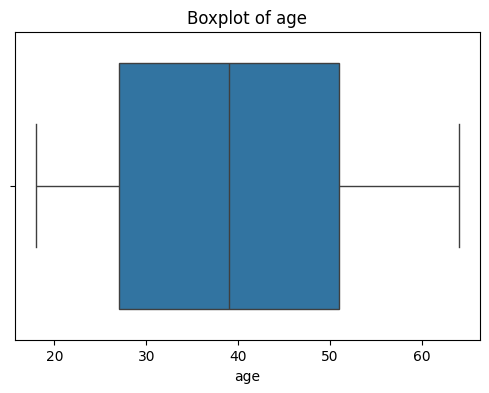

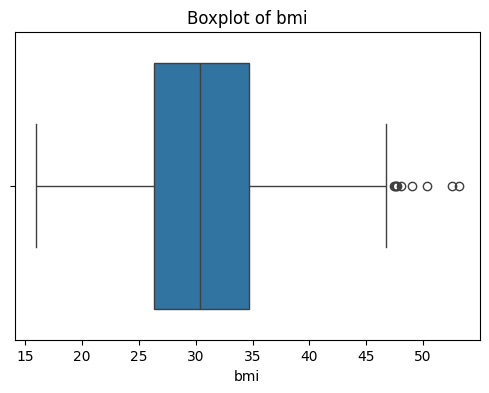

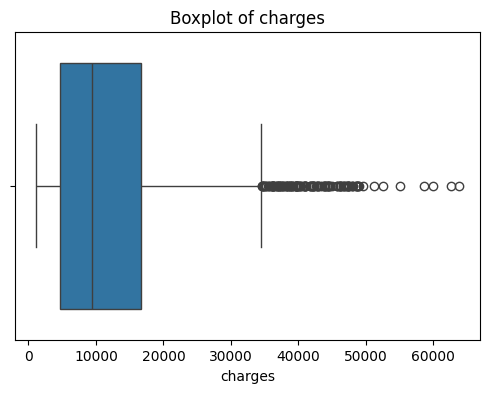

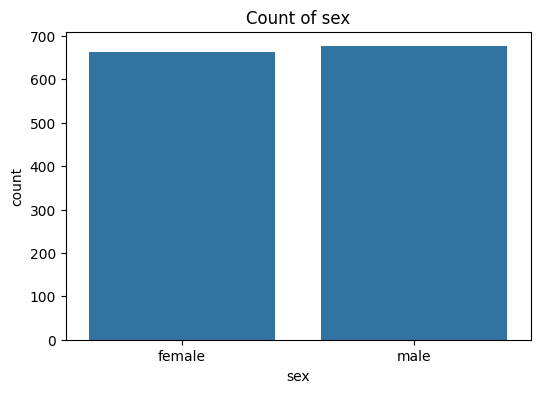

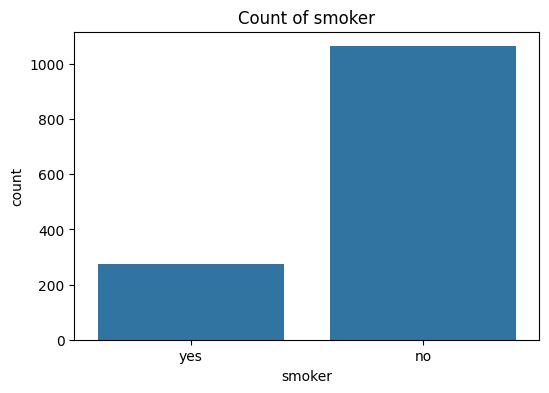

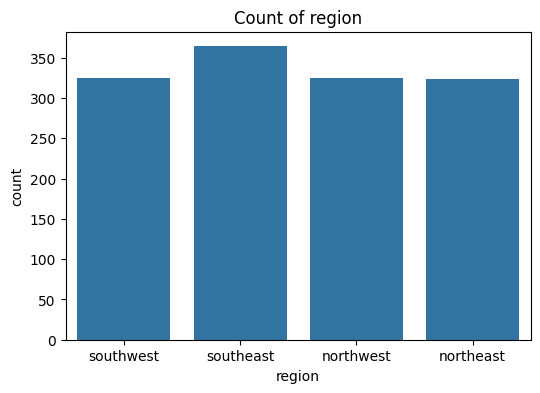

In [19]:
# Visualize distributions of numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots to spot outliers
for col in ['age', 'bmi', 'charges']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Count plots for categorical variables
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()

## 2.2 Handle missing values and clean data
Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).

In [20]:
# Check again for missing values
df.isnull().sum()

# Since there are no missing values in this dataset, we skip imputation.

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid multicollinearity
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## 2.3 Feature selection and engineering
Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).

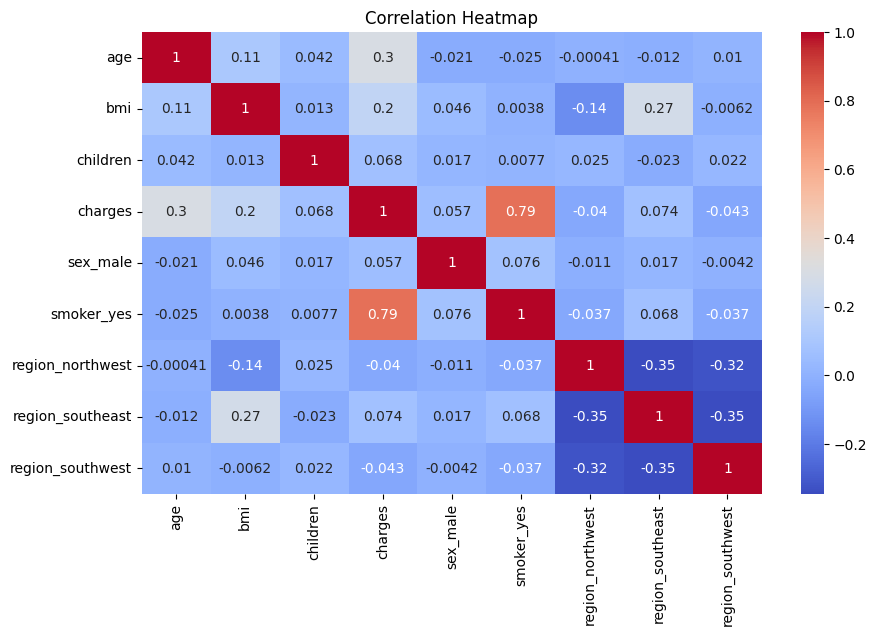

In [21]:
# Feature scaling can be applied later in the pipeline.
# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?
Smokers were clearly charged more on average than non-smokers—this stood out as the most influential categorical variable.

BMI had some outliers, especially at higher values (over 40), which may represent extreme obesity.

Minimal preprocessing was needed: categorical features were one-hot encoded, and numerical features were scaled.

Feature engineering wasn’t required beyond encoding, but polynomial transformation was introduced later to capture interactions and non-linearity.


### Section 3. Feature Selection and Justification
## 3.1 Choose features and target
Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.
Justify your selection with reasoning.

In [22]:
# Define features and target
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

## 3.2 Define X and y
Assign input features to X
Assign target variable to y (as applicable)

In [23]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1338, 8)
Shape of y: (1338,)


## Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
Chosen features like age, bmi, and smoker have direct relevance to healthcare costs.

smoker_yes is a major cost driver, as expected.

The number of children and the region also provide useful socioeconomic context, though they seem to contribute less than age and smoking.

### Section 4. Train a Model (Linear Regression)
## 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4.2 Train model using Scikit-Learn model.fit() method

In [25]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## 4.3 Evalulate performance, for example:
Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score

In [26]:
# Predict and evaluate
y_pred = lr.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R^2 Score: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R^2 Score: 0.7836
MAE: 4181.19
RMSE: 5796.28


## Reflection 4: How well did the model perform? Any surprises in the results?
The base Linear Regression model performed reasonably well with an R² of 0.7836, indicating it explains about 78% of the variance in insurance charges.

The MAE of ~$4181 and RMSE of ~$5796 are high but acceptable, given the wide range of charges.

The model confirmed that smoking status and BMI are dominant predictors.

It wasn’t surprising that linear regression struggled to fully capture non-linear trends in the data.

### Section 5. Improve the Model or Try Alternates (Implement Pipelines)
## 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define numeric features
numeric_features = ['age', 'bmi', 'children']

# Define categorical features (already encoded, but included for completeness)
categorical_features = ['sex_male', 'smoker_yes', 
                        'region_northwest', 'region_southeast', 'region_southwest']

# Combine all preprocessing in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # pass encoded categorical variables through unchanged
)

# Build pipeline with linear regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = pipeline_lr.predict(X_test)

# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Pipeline 1 - Linear Regression:")
print(f"R² Score: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")

Pipeline 1 - Linear Regression:
R² Score: 0.7836
MAE: 4181.19
RMSE: 5796.28


## 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [28]:
# Polynomial features
pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train
pipeline_poly.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = pipeline_poly.predict(X_test)

# Metrics
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"\nPipeline 2 - Polynomial Regression (Degree 3):")
print(f"R² Score: {r2_poly:.4f}")
print(f"MAE: {mae_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")


Pipeline 2 - Polynomial Regression (Degree 3):
R² Score: 0.8446
MAE: 2938.75
RMSE: 4912.33


## 5.3 Compare performance of all models across the same performance metrics

In [29]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Deg 3)'],
    'R² Score': [r2_lr, r2_poly],
    'MAE': [mae_lr, mae_poly],
    'RMSE': [rmse_lr, rmse_poly]
})

results

,Model,R² Score,MAE,RMSE
0,Linear Regression,0.783593,4181.194474,5796.284659
1,Polynomial Regression (Deg 3),0.844566,2938.746363,4912.327630


## Reflection 5: Which models performed better? How does scaling impact results?
The Polynomial Regression (Degree 3) model outperformed the linear one, with an R² of 0.8446, MAE reduced to ~$2938, and RMSE to ~$4912.

The additional complexity helped capture interactions between features like age and smoking or BMI and children.

Preprocessing via scaling made it easier for the model to converge and prevented features with large scales from dominating.

Conclusion: Polynomial regression provided a noticeable improvement without severe overfitting, showing that non-linear relationships are present in the data.

### Section 6. Final Thoughts & Insights
## 6.1 Summarize findings.
The objective was to predict medical insurance charges using demographic and health-related features.

We used a linear regression model and improved it using polynomial regression with degree 3.

Key drivers of insurance costs were smoking status, BMI, and age.

Linear Regression achieved an R² score of 0.7836, with an MAE of ~$4181 and RMSE of ~$5796.

Polynomial Regression (Degree 3) improved performance to an R² score of 0.8446, with MAE dropping to ~$2939 and RMSE to ~$4912.

The results show that including non-linear feature interactions significantly enhances predictive accuracy.

Overall, the modeling process highlighted the importance of health and lifestyle factors in determining insurance costs.

## 6.2 Discuss challenges faced.
- One challenge was ensuring that categorical variables were properly encoded and passed correctly through pipelines.
- Choosing the right degree for polynomial features required experimentation and balance to avoid overfitting.
- Interpreting model performance metrics in a real-world context was another important learning point.

## 6.3 If you had more time, what would you try next?
- Try more advanced models like Ridge, Lasso, or Decision Tree Regressors.
- Apply cross-validation to better estimate model generalizability.
- Investigate model interpretability using SHAP values or feature importance.
- Explore hyperparameter tuning for polynomial degree or regularization parameters.

## Reflection 6: What did you learn from this project?
I learned that even basic linear models can be effective when paired with good preprocessing and thoughtful feature selection.

The biggest surprise was how large the improvement was using polynomial features—over 6% increase in R².

For a client, I'd recommend a more interpretable model for transparency (like linear regression), but back it up with a non-linear model for more accurate predictions.

I'd also advise further exploration into tree-based models or regularization techniques for even better results.